In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
books = pd.read_csv("Books.csv")

F:\anaconda3\envs\python_3_7\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
users = pd.read_csv("Users.csv")

In [4]:
ratings = pd.read_csv("Ratings.csv")

In [5]:
df_ratings_books = ratings.merge(books, on='ISBN', how='inner')

In [6]:
df_ratings_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


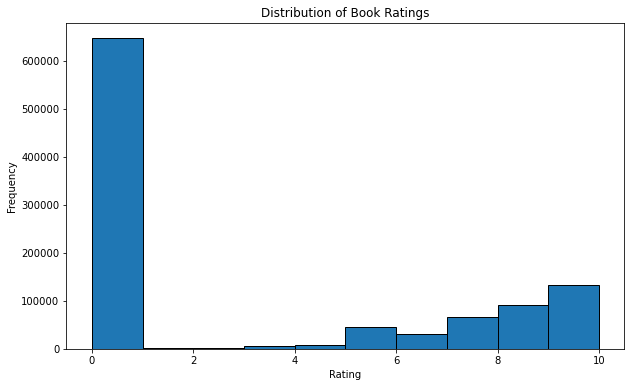

In [7]:
plt.figure(figsize=(10, 6))
df_ratings_books['Book-Rating'].dropna().hist(bins=10, edgecolor='black')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

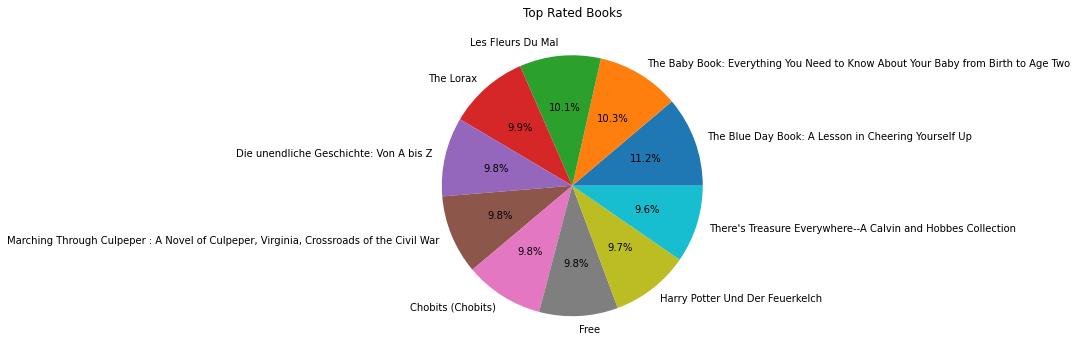

In [13]:
threshold = 10
book_ratings_mean_count = df_ratings_books.groupby('Book-Title')['Book-Rating'].agg(['mean', 'count'])
top_rated_books = book_ratings_mean_count[book_ratings_mean_count['count'] > threshold].sort_values('mean', ascending=False)

plt.figure(figsize=(10, 6))
top_rated_books['mean'].head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top Rated Books')
plt.ylabel('')
plt.show()


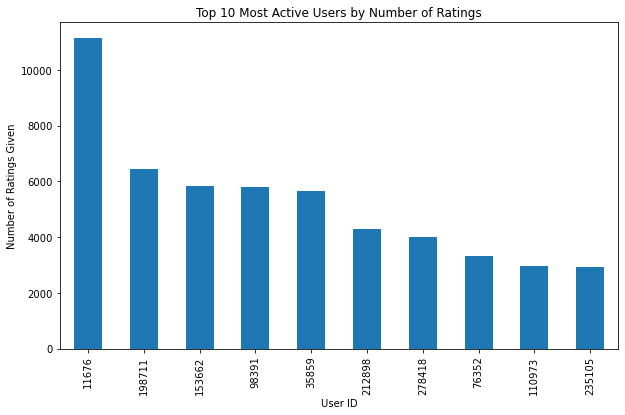

In [9]:
user_activity = df_ratings_books.groupby('User-ID').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
user_activity.head(10).plot(kind='bar')
plt.title('Top 10 Most Active Users by Number of Ratings')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings Given')
plt.show()

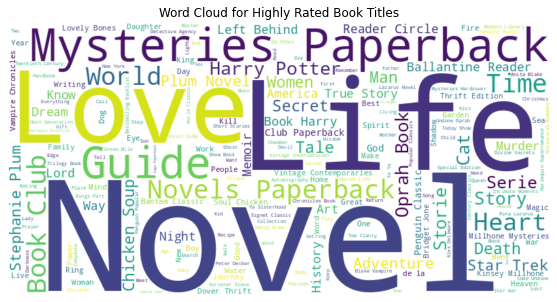

In [10]:
highly_rated_books = df_ratings_books[df_ratings_books['Book-Rating'] > 4]['Book-Title']
text = " ".join(title for title in highly_rated_books)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Highly Rated Book Titles')
plt.show()

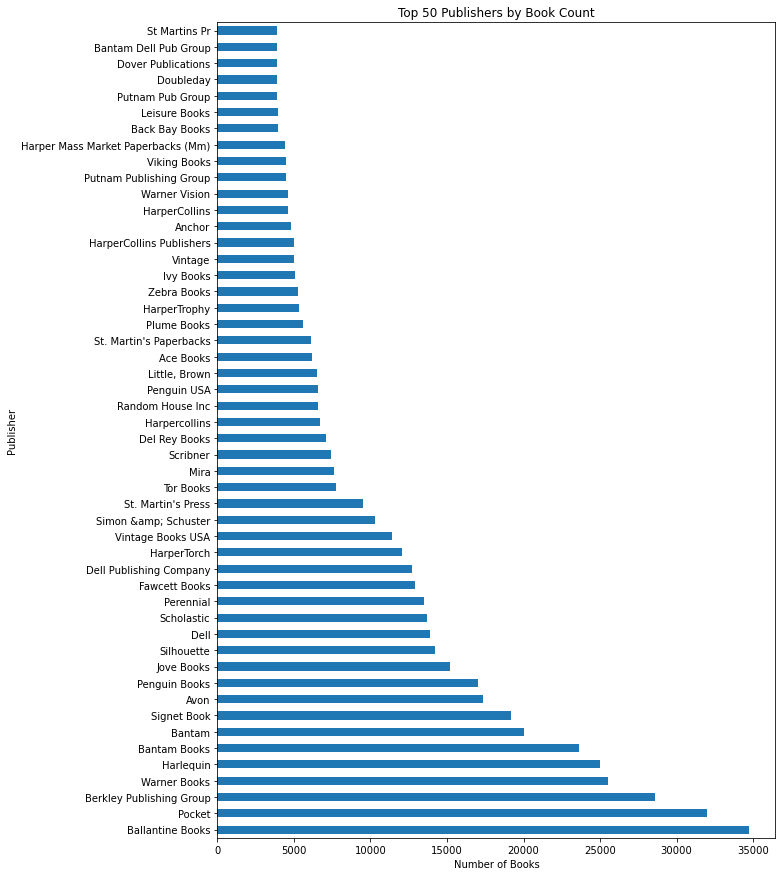

In [14]:
plt.figure(figsize=(10, 15))
df_ratings_books['Publisher'].value_counts().head(50).plot(kind='barh')
plt.title('Top 50 Publishers by Book Count')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()


F:\anaconda3\envs\python_3_7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


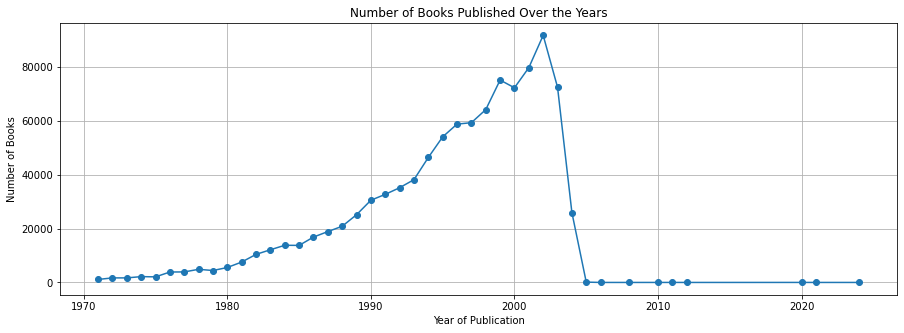

In [19]:
plt.figure(figsize=(15, 5))
filtered_df = df_ratings_books[(df_ratings_books['Year-Of-Publication'] != '0') & (df_ratings_books['Year-Of-Publication'] != 'Gallimard') & (df_ratings_books['Year-Of-Publication'] != 'DK Publishing Inc')]
filtered_df['Year-Of-Publication'] = pd.to_numeric(filtered_df['Year-Of-Publication'], errors='coerce')
filtered_df = filtered_df[(filtered_df['Year-Of-Publication'] > 1970) & (filtered_df['Year-Of-Publication'] < 2025)]
filtered_df = filtered_df[~filtered_df['Year-Of-Publication'].isna()]
filtered_df['Year-Of-Publication'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Books Published Over the Years')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()
